<a href="https://colab.research.google.com/github/CamiSilvae/PDI/blob/main/Laboratorio/Pr%C3%A1cticas/Practica3/PDI_P3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica N°03
**Clustering de una imagen**


---

EQUIPO 8

*   2109522 - Camila Andrea Silva Espinoza
*   2049215 - Norma Cecilia Cázares del Ángel
*   2109208 - Alejandro de Jesús Guerrero Maynes
*   2109690 - Mariana Seany Zamarripa Puente


**1. Carga de un archivo**

La siguiente función se encarga de abrir una ventana para subir una imagen y la variable *"uploaded"* se encarga de guardarlo con el nombre del archivo

In [1]:
from google.colab import files

uploaded = files.upload ()

Saving FloresColoridas.jpg to FloresColoridas.jpg


**2. Instalación e importación de librebrías**

Instala las librerias necesarias y las importa; *"Kmeans"* se utilizará para lograr agrupar los colores

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

**3. Leer la imagen en Colab**

Esta siguiente parte se encarga de leer el archivo directamente desde *"uploaded"*, además de convertir la imagen BGR a RGB logrando redimensionandola para acelerar los cálculos

In [3]:
def leer_imagen_colab(uploaded_dict, reducir=True, tam=(140,140)):
    nombre_archivo = next(iter(uploaded_dict.keys()))
    img_bgr = cv2.imread(nombre_archivo)
    if img_bgr is None:
        raise ValueError("No se pudo leer la imagen. Verifica el formato.")
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    if reducir:
        img_rgb = cv2.resize(img_rgb, tam)
    return img_rgb

**4. Segmentación por K-means**

El siguiente apartado tiene la función de transformar la imagen en una lista de píxeles y aplicando K-means se logra agrupar los píxeles en *"k"* que viene siendo los colores representativos, reconstruyendo así la imagen al reemplazar cada píxel por su color promedio *(centroide)*

In [4]:
def segmentar_por_kmeans(img_rgb, k=3, semillas=10):
    pixeles = img_rgb.reshape((-1,3)).astype(np.float32)
    modelo = KMeans(n_clusters=k, random_state=42, n_init=semillas)
    modelo.fit(pixeles)
    etiquetas = modelo.labels_
    centros = np.uint8(modelo.cluster_centers_)
    img_segmentada = centros[etiquetas.flatten()].reshape(img_rgb.shape)
    return img_segmentada, centros, etiquetas, pixeles

**5. Gráfica RGB 3D**

La siguiente parte muestra los valores RGB de una muestra de píxeles en un espacio tridimensional para mostrar los centroides de los clusters

In [5]:
def graficar_rgb_3d(pixeles, centros=None, titulo="Espacio RGB"):
    fig = plt.figure(figsize=(9,7))
    ax = fig.add_subplot(111, projection='3d')
    N = min(2000, len(pixeles))
    muestra = pixeles[np.random.choice(len(pixeles), N, replace=False)] / 255.0
    ax.scatter(muestra[:,0], muestra[:,1], muestra[:,2],
               c=muestra, marker='o', s=18, alpha=0.6, label='Pixeles')
    if centros is not None:
        c_norm = centros / 255.0
        ax.scatter(c_norm[:,0], c_norm[:,1], c_norm[:,2],
                   c=c_norm, marker='X', s=140, edgecolors='k',
                   linewidths=1.5, label='Centroides')
    ax.set_xlabel('R')
    ax.set_ylabel('G')
    ax.set_zlabel('B')
    ax.set_title(titulo)
    ax.legend()
    plt.tight_layout()
    plt.show()

**6. Comparación de segmentaciones**

Muestra varias segmentaciones con distintos valores de *"k"* y presenta la imagen original, segmentadas, además de sus paletas de colores para después graficar el espacio RGB para cada valor de *"k"*

In [6]:
def comparar_segmentaciones(img_rgb, lista_k):
    filas = len(lista_k)
    fig = plt.figure(figsize=(16, 5*filas))
    for i, k in enumerate(lista_k):
        seg, centros, etiquetas, pix = segmentar_por_kmeans(img_rgb, k=k)
        if i == 0:
            ax0 = fig.add_subplot(filas, 3, 1)
            ax0.imshow(img_rgb)
            ax0.set_title("Imagen Original")
            ax0.axis('off')
        ax_seg = fig.add_subplot(filas, 3, i*3 + 2)
        ax_seg.imshow(seg)
        ax_seg.set_title(f"Segmentación (k={k})")
        ax_seg.axis('off')
        ax_pal = fig.add_subplot(filas, 3, i*3 + 3)
        colores = centros/255.0
        ax_pal.imshow([colores], aspect='auto')
        ax_pal.set_title(f"Paleta (k={k})")
        ax_pal.set_yticks([])
        ax_pal.set_xticks(range(k))
        ax_pal.set_xticklabels([f"C{j+1}" for j in range(k)])
        for j, col in enumerate(colores):
            r,g,b = col
            texto = f"R:{r:.2f}\nG:{g:.2f}\nB:{b:.2f}"
            ax_pal.text(j, 0, texto, ha='center', va='top',
                        fontsize=8, color='white' if np.mean(col)<0.5 else 'black')
    plt.tight_layout()
    plt.show()
    for k in lista_k:
        _, centros, _, pix = segmentar_por_kmeans(img_rgb, k=k)
        graficar_rgb_3d(pix, centros, titulo=f"Espacio RGB (k={k})")

**7. Ejecución**

Esta parte final se encarga de caragar y mostrar la imagen, visualizar la nube RGB original, comparar distintos valores de k, realizar una segmentación final con *k=12* y mostrar los resultados finales y paletas de color

INICIO DEL PROCESO DE SEGMENTACIÓN
Imagen cargada con éxito. DIMENSIONES: (140, 140, 3)


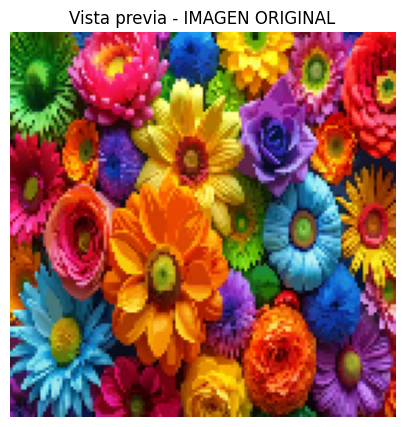

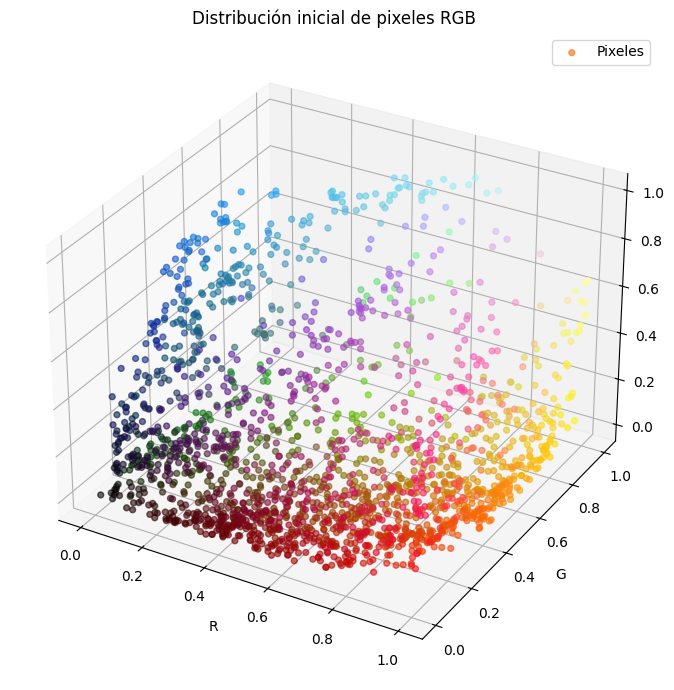


 PROBANDO DISTINTOS VALORES DE k = [2, 4, 6]


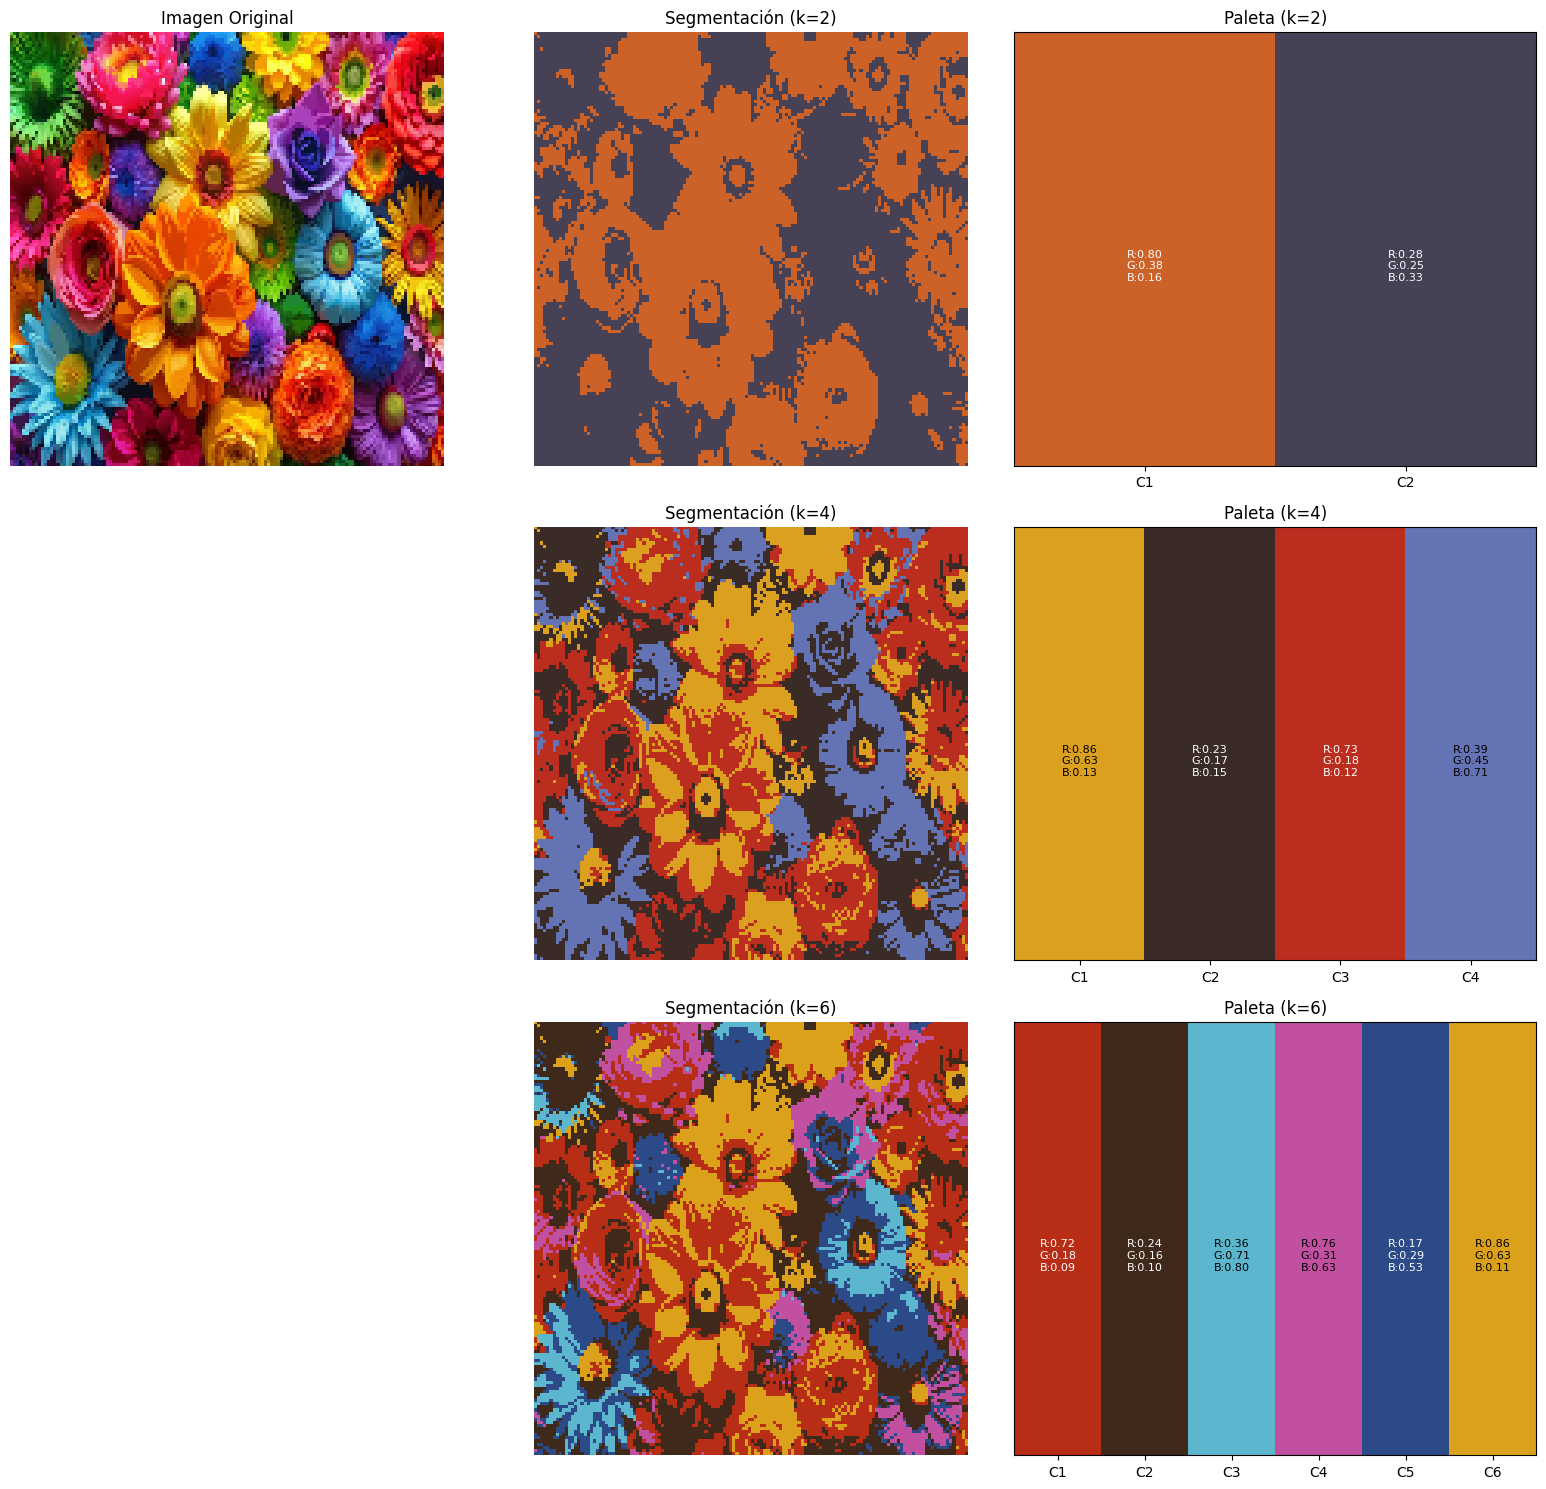

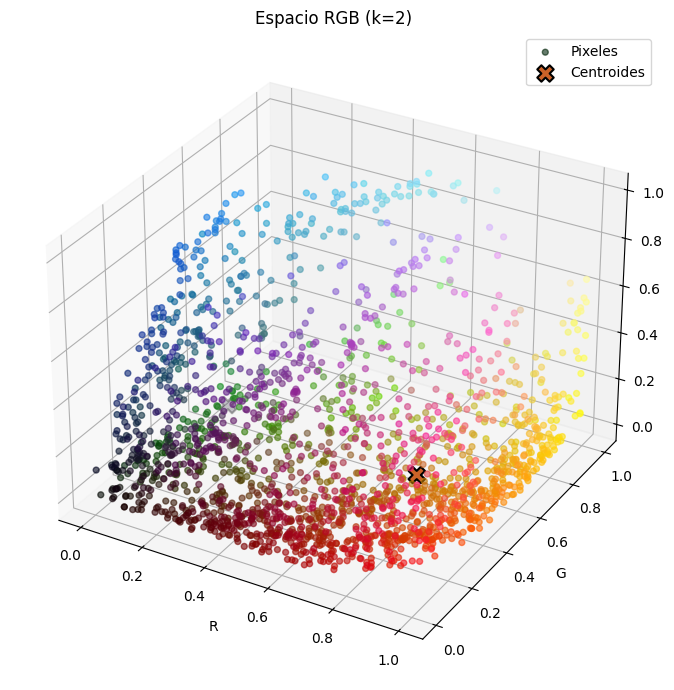

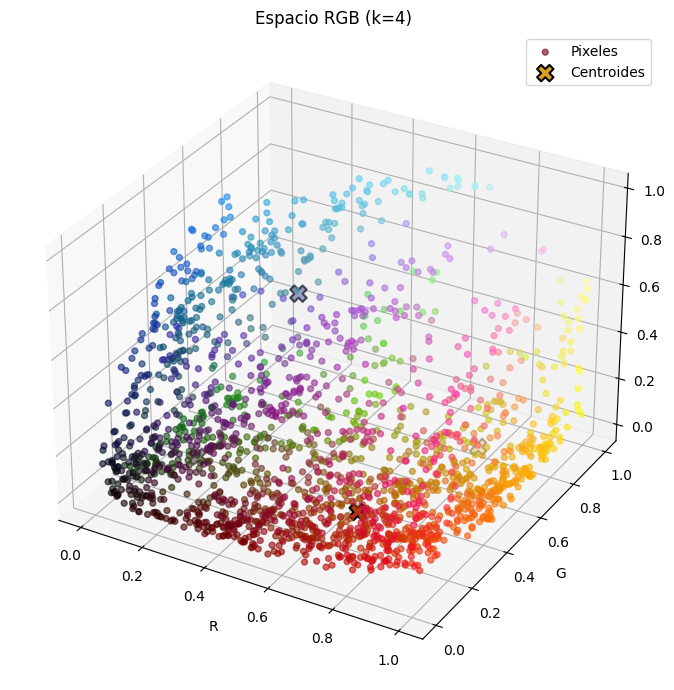

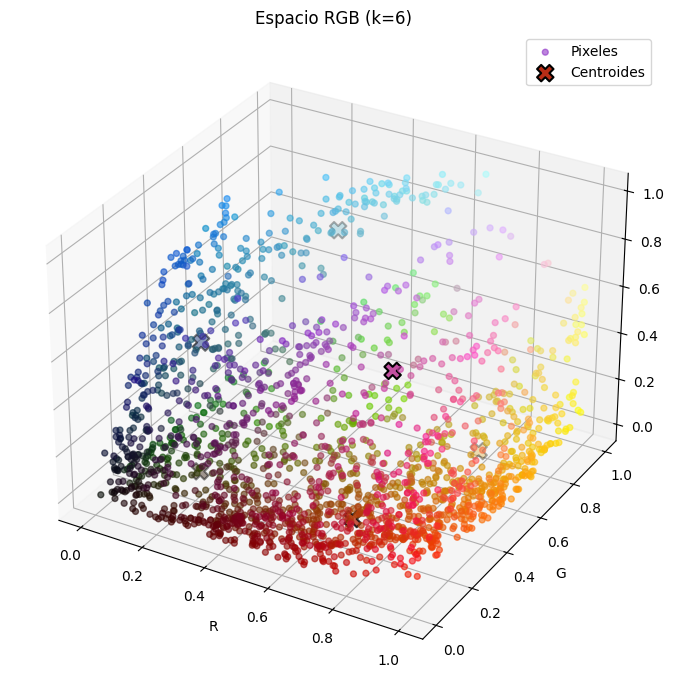


 SEGMENTACIÓN PRÁCTICA con k = 3


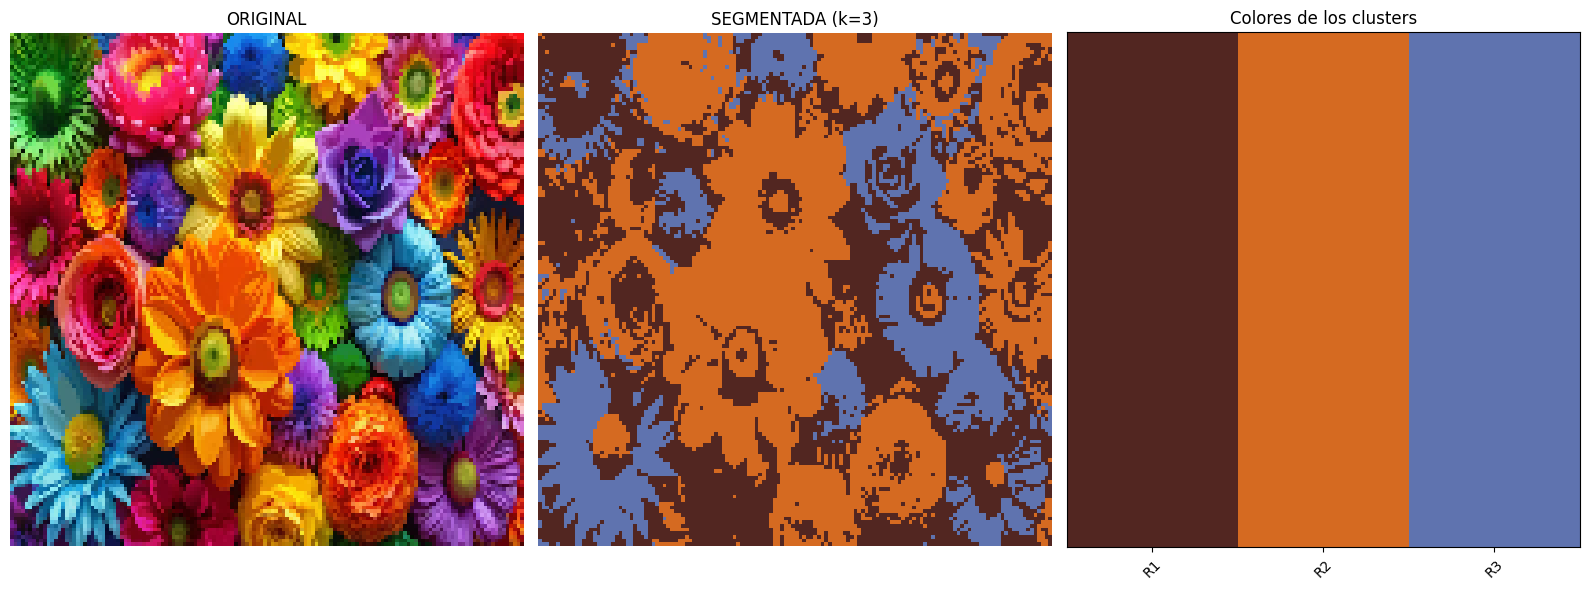


 FIN del análisis de clustering


In [9]:
print("INICIO DEL PROCESO DE SEGMENTACIÓN")

imagen = leer_imagen_colab(uploaded, reducir=True, tam=(140,140))
print("Imagen cargada con éxito. DIMENSIONES:", imagen.shape)

plt.figure(figsize=(7,5))
plt.imshow(imagen)
plt.title("Vista previa - IMAGEN ORIGINAL")
plt.axis('off')
plt.show()

pix = imagen.reshape((-1,3)).astype(np.float32)
graficar_rgb_3d(pix, centros=None, titulo="Distribución inicial de pixeles RGB")

# Comparar varios k
lista_k = [2, 4, 6]
print("\n PROBANDO DISTINTOS VALORES DE k =", lista_k)
comparar_segmentaciones(imagen, lista_k)

# Segmentación práctica con k=3 (identificar 3 regiones u objetos)
k_final = 3
print(f"\n SEGMENTACIÓN PRÁCTICA con k = {k_final}")
seg_final, centros_final, etiquetas_final, pix_final = segmentar_por_kmeans(imagen, k=k_final)

fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(1,3,1); ax1.imshow(imagen); ax1.set_title("ORIGINAL"); ax1.axis('off')
ax2 = fig.add_subplot(1,3,2); ax2.imshow(seg_final); ax2.set_title(f"SEGMENTADA (k={k_final})"); ax2.axis('off')
ax3 = fig.add_subplot(1,3,3); ax3.imshow([centros_final/255.0], aspect='auto')
ax3.set_title("Colores de los clusters"); ax3.set_yticks([])
ax3.set_xticks(range(k_final))
ax3.set_xticklabels([f"R{i+1}" for i in range(k_final)], rotation=45)
plt.tight_layout(); plt.show()

print("\n FIN del análisis de clustering")